

TEAM 7 by Manami Hayashi, Lukas Nackmayr, and William Kasasa


**Functionality:**

1.  `from google.colab import drive`: Imports the necessary module for Google Drive integration.
2.  `drive.mount('/content/drive')`: Mounts your Google Drive at the specified path (`/content/drive`). This will prompt you to authorize access to your Drive.

**Purpose:**

Mounting Google Drive enables you to:

*   Load datasets directly from your Drive.
*   Save model checkpoints and other files to your Drive for persistence.
*   Access any other files you need for your Colab notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Libraries and their Purposes:**

*   **`torch`:** The core PyTorch library for deep learning.
*   **`torch.nn`:** Provides neural network modules and building blocks.
*   **`torch.optim`:** Contains optimization algorithms for training neural networks.
*   **`torchvision`:** Includes datasets, transformations, and models for computer vision tasks.
*   **`mpl_toolkits.mplot3d.proj3d`:** Used for 3D plotting, but its relevance here is unclear. It might be unused.
*   **`torchvision.datasets, torchvision.transforms`:** Used for loading and preprocessing image datasets.
*   **`torch.utils.data.DataLoader`:** Creates data loaders for efficient batch processing.
*   **`matplotlib.pyplot`:** Used for creating visualizations (plots, charts).
*   **`numpy`:** Provides numerical computing tools and array operations.

**Purpose:**

This cell sets up the environment by importing the necessary tools for:

*   Defining the CNN model architecture using `torch.nn`.
*   Training the model using optimization algorithms from `torch.optim`.
*   Loading and preprocessing image data using `torchvision`.
*   Creating data loaders for efficient training and evaluation using `torch.utils.data.DataLoader`.
*   Visualizing data and results using `matplotlib.pyplot`.
*   Performing numerical computations using `numpy`.

In [16]:
# Step 1: Import Libraries
import torch  # pytorch package import
import torch.nn as nn
import torch.optim as optim
import torchvision # pytorch vision package import
from mpl_toolkits.mplot3d.proj3d import transform
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd



Our FER2013Dataset has separate images folders and csv file for the lable, so I make Custom Dataset class to handle csv file for loading the data, processing it into training, validaition, and testing dataset, and preparing PyTorch dataLoader objects

**Functionality:**

1.  **Imports:** Imports necessary libraries:
    *   `pandas` (as `pd`) for data manipulation.
    *   `numpy` (as `np`) for numerical operations.
    *   `random` for random choice.
    *   `os` for file path operations.

2.  **`load_data` Function:**
    *   Takes two arguments: `path_old` (path to original FER2013 CSV) and `path_new` (path to updated labels CSV).
    *   Checks if both files exist; raises a `FileNotFoundError` if not.
    *   Loads both CSV files into pandas DataFrames (`fer2013`, `fer_new`).
    *   Extracts emotion labels from `fer_new` (columns 2 onward) into a NumPy array (`label`).
    *   Prints the head of the original `fer2013` DataFrame and the first 5 emotion labels.
    *   Iterates through the labels, finding the emotion with the maximum value (or randomly choosing one if there's a tie) and updates the 'emotion' column in `fer2013`.
    *   Prints the head of the updated `fer2013` DataFrame.
    *   Saves the updated DataFrame to a new CSV file named 'fer2013_new.csv'.
    *   Prints a message confirming the save location.

**Purpose:**

This cell prepares the FER2013 dataset for modeling by:

*   Loading the original dataset and the updated emotion labels.
*   Updating the emotion labels in the original dataset based on the new labels.
*   Saving the updated dataset to a new CSV file, which will be used for training and evaluation.

In [17]:
import pandas as pd
import numpy as np
import random
import os

def load_data(path_old, path_new):
    """
    Load the original and new FER datasets, update emotion labels, and save to a new CSV.

    Args:
        path_old (str): Path to the original fer2013.csv file.
        path_new (str): Path to the fer2013new.csv file.
    """
    if not os.path.exists(path_old) or not os.path.exists(path_new):
        raise FileNotFoundError("One or both input file paths do not exist.")

    # Load the datasets
    fer2013 = pd.read_csv(path_old)
    fer_new = pd.read_csv(path_new)

    # Extract label data from fer_new (assuming emotions are in columns 2 onward)
    label = fer_new.iloc[:, 2:].to_numpy()
    print("Original FER2013 Data:\n", fer2013.head())
    print("Emotion Labels from FER2013New:\n", label[:5])

    # Update emotion labels in fer2013
    for i in range(len(label)):
        max_indices = np.argwhere(label[i] == np.amax(label[i])).flatten()
        selected_emotion = random.choice(max_indices)  # Randomly choose one emotion if there's a tie
        fer2013.loc[i, 'emotion'] = int(selected_emotion)  # Update the 'emotion' column safely

    print("Updated FER2013 Data:\n", fer2013.head())

    # Save updated data to a new CSV
    output_path = './fer2013_new.csv'
    fer2013.to_csv(output_path, index=False)
    print(f"Updated dataset saved to {output_path}")



**Functionality:**

1.  **Path Configuration:**
    *   `base_folder`: Defines the base directory where your dataset is stored. You might need to modify this based on your Google Drive file structure.
    *   `path_old`: Creates the full path to the original `fer2013.csv` file using `os.path.join`.
    *   `path_new`: Creates the full path to the `fer2013new.csv` file containing the updated labels.

2.  **Data Loading:**
    *   `load_data(path_old, path_new)`: Calls the `load_data` function (defined in the previous cell) with the specified paths to load, update, and save the dataset.

**Purpose:**

This cell sets up the paths to the dataset files according to your Google Drive structure. It then calls the `load_data` function to perform the following:

*   Load the original FER2013 dataset from `path_old`.
*   Load the updated emotion labels from `path_new`.
*   Update the original dataset with the new labels.
*   Save the updated dataset to a new CSV file (`fer2013_new.csv`).

**Important:**

*   **Modify `base_folder`:** Make sure to change the `base_folder` variable to the correct path where your dataset is stored in your Google Drive.
*   **File Existence:** Ensure that both `fer2013.csv` and `fer2013new.csv` exist in the specified locations within your Google Drive.

In [19]:
# Update paths based on your file structure
base_folder = '/content/drive/Shareddrives/DATA5DEEP/data'

path_old = os.path.join(base_folder,'fer2013/fer2013/fer2013.csv')

path_new = os.path.join(base_folder, 'fer2013new.csv')

load_data(path_old, path_new)

Original FER2013 Data:
    emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
Emotion Labels from FER2013New:
 [[4 0 0 1 3 2 0 0 0 0]
 [6 0 1 1 0 0 0 0 2 0]
 [5 0 0 3 1 0 0 0 1 0]
 [4 0 0 4 1 0 0 0 1 0]
 [9 0 0 1 0 0 0 0 0 0]]
Updated FER2013 Data:
    emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        0  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        3  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        0  

    Imports:
        Libraries for numerical operations (numpy) and data handling (pandas).
        PyTorch utilities for creating datasets and data loaders (torch, torch.utils.data).
        Image processing tools (PIL.Image, torchvision.transforms).

CustomDataset Class

    A PyTorch dataset class for handling images and labels.
    Arguments:
        images: NumPy array of image data.
        labels: NumPy array of corresponding labels.
        transform: Optional transformations (e.g., resizing, normalization).
    Methods:
        __len__: Returns the dataset size.
        __getitem__: Retrieves a transformed image and label at a given index.

load_data Function

    Loads data from a CSV file.
    Arguments:
        path: Filepath to the CSV dataset.
    Returns:
        DataFrame containing the dataset.
        Mapping of label indices to emotion names.

prepare_data Function

    Converts the dataset into NumPy arrays for images and labels.
    Arguments:
        data: DataFrame containing labels and pixel data.
    Returns:
        image_array: 3D NumPy array of images (shape: [N, 48, 48]).
        image_label: 1D NumPy array of labels.

get_dataloaders Function

    Prepares DataLoaders for training, validation, and testing.
    Arguments:
        path: Filepath to the CSV dataset.
        batch_size: Number of samples per batch.
        augment: Enables data augmentation for the training set.
    Returns:
        DataLoaders for training, validation, and testing.

In [20]:
import numpy as np
import pandas as pd
import torch
import torchvision.transforms as transforms
from PIL import Image
from torch.utils.data import DataLoader, Dataset


class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        """
        Custom PyTorch Dataset for FER2013 images and labels.

        Args:
            images (np.ndarray): Array of images.
            labels (np.ndarray): Array of corresponding labels.
            transform (torchvision.transforms): Transformations to apply to the images.
        """
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        """
        Get an item by index.

        Args:
            idx (int): Index of the item.

        Returns:
            Tuple[torch.Tensor, torch.Tensor]: Image and its label.
        """
        img = np.array(self.images[idx])  # Convert to NumPy array if not already
        img = Image.fromarray(img)  # Convert to PIL image

        if self.transform:
            img = self.transform(img)

        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return img, label


def load_data(path='fer2013_new.csv'):
    """
    Load the dataset CSV and return the DataFrame and emotion mapping.

    Args:
        path (str): Path to the FER2013 CSV file.

    Returns:
        Tuple[pd.DataFrame, dict]: DataFrame and emotion mapping.
    """
    fer2013 = pd.read_csv(path)
    emotion_mapping = {0: 'Neutral', 1: 'Happy', 2: 'Surprise', 3: 'Sad', 4: 'Anger',
                       5: 'Disgust', 6: 'Fear', 7: 'Contempt', 8: 'Unknown', 9: 'NF'}
    return fer2013, emotion_mapping


def prepare_data(data):
    """
    Prepare data for modeling.

    Args:
        data (pd.DataFrame): DataFrame with labels and pixel data.

    Returns:
        Tuple[np.ndarray, np.ndarray]: Image array and label array.
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(data['emotion'], dtype=int)

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label


def get_dataloaders(path='fer2013_new.csv', batch_size=64, augment=True):
    """
    Prepare DataLoaders for training, validation, and testing.

    Args:
        path (str): Path to the FER2013 CSV file.
        batch_size (int): Batch size for the DataLoaders.
        augment (bool): Whether to apply data augmentation to the training set.

    Returns:
        Tuple[DataLoader, DataLoader, DataLoader]: Training, validation, and testing DataLoaders.
    """
    fer2013, emotion_mapping = load_data(path)

    xtrain, ytrain = prepare_data(fer2013[fer2013['Usage'] == 'Training'])
    xval, yval = prepare_data(fer2013[fer2013['Usage'] == 'PrivateTest'])
    xtest, ytest = prepare_data(fer2013[fer2013['Usage'] == 'PublicTest'])

    mu, st = 0, 255  # Normalization mean and std

    # Define transformations
    test_transform = transforms.Compose([
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize(mean=(mu / 255.0,), std=(st / 255.0,)),
    ])

    if augment:
        train_transform = transforms.Compose([
            transforms.Grayscale(),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.ToTensor(),
            transforms.Normalize(mean=(mu / 255.0,), std=(st / 255.0,)),
        ])
    else:
        train_transform = test_transform

    # Create datasets
    train_dataset = CustomDataset(xtrain, ytrain, transform=train_transform)
    val_dataset = CustomDataset(xval, yval, transform=test_transform)
    test_dataset = CustomDataset(xtest, ytest, transform=test_transform)

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

    return train_loader, val_loader, test_loader



**Functionality:**

1.  **Dataset Path:**
    *   `path`: Sets the path to the processed dataset file (`fer2013_new.csv`), which was created in the previous step. It uses `os.path.join` to ensure platform compatibility.

2.  **Data Loaders:**
    *   `get_dataloaders`: Calls a function (presumably defined elsewhere in the notebook) to create data loaders for training, validation, and testing.
    *   `path='./fer2013_new.csv'`: Specifies the path to the dataset file for the `get_dataloaders` function. This should be the same as the `path` variable defined earlier.
    *   `batch_size=64`: Sets the batch size for the data loaders.
    *   `augment=True`: Enables data augmentation for the training set.

3.  **Batch Check:**
    *   Iterates through the `train_loader` to get a single batch of images and labels.
    *   Prints the size of the batch images and labels using `print(f"Batch Images: {batch_images.size()}, Batch Labels: {batch_labels.size()}")`. This is useful for verifying the data loading process.
    *   `break`: Exits the loop after processing one batch.

**Purpose:**

This cell is crucial for preparing the data for training and evaluation. It:

*   Sets the path to the processed dataset file.
*   Creates data loaders for training, validation, and testing, which are essential for efficiently feeding data to the model during training and evaluation.
*   Checks a single batch to ensure that the data loading process is working correctly.

**Dependencies:**

*   **`get_dataloaders` function:** This function needs to be defined elsewhere in the notebook. It is responsible for loading the dataset, splitting it into training, validation, and testing sets, and creating the data loaders.


In [21]:
# Path to the dataset
path = os.path.join('/content/drive/Shareddrives/DATA5DEEP/data/fer2013/fer2013/fer2013_new.csv')  # use fer2013new.csv

# Get DataLoaders
train_loader, val_loader, test_loader = get_dataloaders(path='/content/drive/Shareddrives/DATA5DEEP/data/fer2013/fer2013/fer2013_new.csv', batch_size=64, augment=True) # use './fer2013_new.csv'

# Check a single batch
for batch_images, batch_labels in train_loader:
  print(f"Batch Images: {batch_images.size()}, Batch Labels: {batch_labels.size()}")
  break

Batch Images: torch.Size([64, 1, 48, 48]), Batch Labels: torch.Size([64])


## **Model Overview**
This CNN is designed to process grayscale images of size 48x48 pixels. It performs the following key operations:
1. **Feature Extraction**: Utilizes convolutional layers to detect spatial patterns in the input images.
2. **Dimensionality Reduction**: Applies max pooling to reduce the spatial dimensions while retaining important features.
3. **Regularization**: Employs dropout layers to reduce overfitting.
4. **Classification**: Uses fully connected layers to map the extracted features to output classes.

---

## **Model Components**

### **1. Convolutional Layers**
- **Purpose**: Extract spatial features from the input image.
- **Layers**:
  - `conv1`: 1 input channel, 32 output channels, 3x3 kernel.
  - `conv2`: 32 input channels, 64 output channels, 3x3 kernel.
  - `conv3`: 64 input channels, 128 output channels, 3x3 kernel.
- **Activation**: ReLU (Rectified Linear Unit) is applied after each convolution to introduce non-linearity.

### **2. Pooling Layer**
- **Purpose**: Reduce the spatial size of the feature maps, improving computational efficiency and preventing overfitting.
- **Type**: MaxPooling with a 2x2 kernel and a stride of 2.
- **Effect**: Halves the spatial dimensions of the feature maps.

### **3. Dropout Layers**
- **Purpose**: Regularization to reduce overfitting by randomly setting a fraction of neurons to zero during training.
- **Types**:
  - `dropout_conv`: Applied after convolutional layers with a dropout rate of 0.25.
  - `dropout_fc`: Applied after fully connected layers with a dropout rate of 0.5.

### **4. Fully Connected Layers**
- **Purpose**: Perform the final classification based on the extracted features.
- **Structure**:
  - `fc1`: Maps the flattened feature vector to 128 neurons.
  - `fc2`: Maps the 128 neurons to 10 output classes (e.g., for a 10-class classification problem).
- **Activation**: ReLU is applied to `fc1`.

### **5. Flattening**
- **Purpose**: Converts the multi-dimensional tensor from the convolutional layers into a one-dimensional vector suitable for the fully connected layers.
- **Process**: Dynamically flattens the tensor based on the batch size.

---

## **Feature Map Size Calculation**
- The `_calculate_feature_map_size` method determines the spatial dimensions of the feature maps after the convolution and pooling layers.
- **Input**: Original image size (48x48 pixels).
- **Output**: Final feature map size after 3 convolution and pooling stages.

---

## **Forward Pass**
- The `forward` method defines how the input tensor is processed through the network.
- **Steps**:
  1. Pass the input through convolutional layers with ReLU activation, pooling, and dropout.
  2. Flatten the feature map.
  3. Pass the flattened tensor through fully connected layers with ReLU activation and dropout.
  4. Produce the final class scores.

---

## **Model Summary**
- **Input**: Grayscale image of size 48x48.
- **Output**: Logits for 10 classes.
- **Key Features**:
  - Robust feature extraction using multiple convolutional layers.
  - Dimensionality reduction through pooling.
  - Regularization with dropout layers.
  - Efficient and dynamic handling of input dimensions for fully connected layers.

This model structure is flexible and can be adapted for similar image classification tasks by modifying input dimensions, output classes, or dropout rates.

## **Remarks**

**First-trial**: 2 convolutional layers, resulted in 68% test accuracy.<br>
**Second_trial**:Added 3rd convolutional layers, resulted in 70% test accuracy.<br> **Third_trial**:Added dropout and add weight Decay to optimizer,<br>

In [22]:
import torch.nn as nn
import torch.nn.functional as F

# Step 3: Define the CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Dropout Layers
        self.dropout_conv= nn.Dropout2d(p=0.25)
        self.dropout_fc = nn.Dropout(p=0.5)


        # Calculate feature map size after convolutions and pooling
        self.feature_map_size = self._calculate_feature_map_size(48)

        # Fully connected layers
        self.fc1 = nn.Linear(in_features=128 * self.feature_map_size * self.feature_map_size, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)




    def _calculate_feature_map_size(self, input_size):
        """
        Calculate the size of the feature map after convolutions and pooling.

        Args:
            input_size (int): Size of the input image (assumed square).

        Returns:
            int: Size of the feature map.
        """
        size = input_size
        for _ in range(3):  # 3 convolutional layers
            size = (size - 3 + 2 * 1) // 1 + 1  # Convolution
            size = size // 2  # Pooling (halves the size)
        return size

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # call activation function
        x = self.dropout_conv(x)
        x = self.pool(torch.relu(self.conv2(x)))  # call activation function
        x = self.dropout_conv(x)
        x = self.pool(torch.relu(self.conv3(x)))  # call activation function
        x = self.dropout_conv(x)

        # Fully connected layers with dropout
        x = x.view(x.size(0), -1)  # Flatten the tensor dinamically
        x = torch.relu(self.fc1(x))  # call activation function
        x = self.dropout_fc(x) # Apply dropout to the fully connected layers
        x = self.fc2(x)
        return x


model = CNN()
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout_conv): Dropout2d(p=0.25, inplace=False)
  (dropout_fc): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=4608, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


**Functionality:**

1.  **Loss Function:**
    *   `criterion = nn.CrossEntropyLoss()`: Creates an instance of the `CrossEntropyLoss` class, which is a commonly used loss function for multi-class classification problems. It calculates the difference between the predicted probabilities and the true labels.

2.  **Optimizer:**
    *   `optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)`: Creates an instance of the `Adam` optimizer, which is an adaptive learning rate optimization algorithm.
        *   `model.parameters()`: Passes the model's parameters to the optimizer so it can update them during training.
        *   `lr=0.001`: Sets the initial learning rate to 0.001.
        *   `weight_decay=1e-4`: Adds L2 regularization with a weight decay factor of 1e-4. This helps prevent overfitting by penalizing large weights.

**Purpose:**

This cell sets up the essential components for training the model:

*   **Loss Function:** The `CrossEntropyLoss` function guides the model's learning by quantifying the error between its predictions and the true labels.
*   **Optimizer:** The `Adam` optimizer updates the model's parameters based on the calculated loss, aiming to minimize the error and improve the model's accuracy. L2 regularization is added to prevent overfitting.

In [23]:
# Step 4: Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()  # Loss function for classification

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  #Added Weight Decay for L2 regularization

## **Step 5 & 6: Training and Evaluation Process**

### **1. Training the Model**
- **Objective**: Optimize the model by minimizing the loss using a training dataset.
- **Process**:
  1. **Epochs**: The model is trained for a predefined number of epochs (e.g., 10).
  2. **Optimizer and Gradients**:
     - Gradients are reset to zero at the start of each batch.
     - Backpropagation is used to compute gradients and update the model's parameters.
  3. **Loss Calculation**:
     - The model's predictions are compared with the ground truth labels.
     - The loss is computed and logged periodically (e.g., every 100 batches).
  4. **Performance Monitoring**: Training loss is printed to track progress.

### **2. Validation Phase**
- **Objective**: Evaluate the model's performance on unseen validation data.
- **Process**:
  1. The model is set to evaluation mode (`model.eval()`), disabling dropout layers.
  2. Predictions are made on the validation dataset.
  3. The total number of correct predictions is calculated.
  4. **Accuracy**: Validation accuracy is computed as a percentage.

### **3. Checkpoint Management**
- **Purpose**: Save the model's state at each epoch and track the best-performing model.
- **Implementation**:
  - **Epoch Checkpoints**:
    - After each epoch, the model's state dictionary is saved in a designated directory (e.g., Google Drive).
    - File naming convention includes the epoch number (e.g., `checkpoint_epoch_1.pth`).
  - **Best Model**:
    - If the validation accuracy of the current epoch exceeds the best recorded accuracy, the model is saved as the "best model."
    - The best model is saved with a static filename (e.g., `best_model.pth`).

---

## **Final Test Evaluation**
- **Objective**: Assess the model's performance on the test dataset.
- **Process**:
  1. The model is set to evaluation mode.
  2. Predictions are made on the test dataset.
  3. The total number of correct predictions is calculated.
  4. **Accuracy**: Test accuracy is computed as a percentage and reported as the final metric.

---

## **Key Parameters and Variables**
- **`num_epochs`**: Total number of training iterations over the dataset.
- **`best_accuracy`**: Tracks the highest validation accuracy achieved during training.
- **`drive_path`**: Directory path where checkpoints and the best model are saved (e.g., Google Drive).
- **`checkpoint_path`**: Path for saving the model state for each epoch.
- **`best_model_path`**: Path for saving the best model based on validation accuracy.

---

## **Key Outputs**
1. **Training Loss**:
   - Logged every 100 batches to monitor optimization progress.
2. **Validation Accuracy**:
   - Reported after each epoch to evaluate generalization to unseen data.
3. **Checkpoints**:
   - Model state is saved after every epoch for reproducibility and debugging.
4. **Test Accuracy**:
   - Final evaluation metric on the test dataset.

---

## **Advantages of this Approach**
- **Continuous Monitoring**: Regularly logs training loss and validation accuracy to track progress.
- **Checkpoints**: Ensures no loss of progress in case of interruptions.
- **Best Model Storage**: Guarantees the best-performing model is preserved for deployment.

This structured training and evaluation pipeline is essential for effectively training deep learning models and managing their performance across datasets.

In [ ]:
# Step 5 & 6: Train and Evaluate the Model with Checkpoints
num_epochs = 10  # Define number of epochs
best_accuracy = 0.0  # Track the best validation accuracy

# Step 6: Define the save paths in Google Drive
drive_path = '/content/drive/Shareddrives/DATA5DEEP'

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 100 == 0:  # Print every 100 batches
            print(
                f"Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}")
            running_loss = 0.0

    # Evaluation Phase
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:  # Use validation loader for evaluation
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate validation accuracy
    accuracy = 100 * correct / total
    print(f"Validation Accuracy after Epoch {epoch + 1}: {accuracy:.4f}%")

    # Save model checkpoint
    checkpoint_path = os.path.join(drive_path, f'checkpoint_epoch_{epoch + 1}.pth')
    torch.save(model.state_dict(), checkpoint_path)  # Save checkpoint

    # Save the best model in Google Drive
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_path = os.path.join(drive_path, 'best_model.pth')
        torch.save(model.state_dict(), best_model_path)  # Save best model
        print(f"Best model saved with accuracy: {best_accuracy:.4f}%")

# Final Test Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.4f}%")


Epoch [1/10], Step [100/449], Loss: 1.7806
Epoch [1/10], Step [200/449], Loss: 1.7104
Epoch [1/10], Step [300/449], Loss: 1.6801
Epoch [1/10], Step [400/449], Loss: 1.6743
Validation Accuracy after Epoch 1: 37.4478%
Best model saved with accuracy: 37.4478%
Epoch [2/10], Step [100/449], Loss: 1.6370
Epoch [2/10], Step [200/449], Loss: 1.6158
Epoch [2/10], Step [300/449], Loss: 1.5717
Epoch [2/10], Step [400/449], Loss: 1.5697
Validation Accuracy after Epoch 2: 48.1193%
Best model saved with accuracy: 48.1193%
Epoch [3/10], Step [100/449], Loss: 1.5251
Epoch [3/10], Step [200/449], Loss: 1.5060
Epoch [3/10], Step [300/449], Loss: 1.4809
Epoch [3/10], Step [400/449], Loss: 1.4539
Validation Accuracy after Epoch 3: 53.1346%
Best model saved with accuracy: 53.1346%
Epoch [4/10], Step [100/449], Loss: 1.4591
Epoch [4/10], Step [200/449], Loss: 1.4306
Epoch [4/10], Step [300/449], Loss: 1.3945
Epoch [4/10], Step [400/449], Loss: 1.3563
Validation Accuracy after Epoch 4: 55.7816%
Best model sa

# Documentation: Visualize Batch Predictions

This document describes the function **`visualize_batch_predictions`**, which visualizes a grid of images from a test dataset alongside their true and predicted labels. The function is specifically designed for multi-class classification problems, such as emotion recognition.

---

## **Function Overview**

### **Name**
`visualize_batch_predictions`

### **Purpose**
- To display a grid of sample images from the test dataset.
- To show the true labels and corresponding model predictions for these images.
- To provide a visual and textual evaluation of the model's performance.

---

## **Arguments**

| Argument          | Type                            | Description                                                                 |
|--------------------|---------------------------------|-----------------------------------------------------------------------------|
| `model`           | `torch.nn.Module`              | Trained PyTorch model used to make predictions.                            |
| `test_loader`     | `torch.utils.data.DataLoader`   | DataLoader object for the test dataset. Contains images and true labels.   |
| `num_samples`     | `int`                           | Number of images to randomly select and display in the grid (default: 5).  |

---

## **Process Flow**

1. **Emotion Mapping**:
   - Maps numeric class labels to human-readable emotion names (e.g., `0: 'Neutral', 1: 'Happy'`).
   - This mapping is defined within the function to ensure clarity.

2. **Set Model to Evaluation Mode**:
   - Disables layers such as dropout to ensure deterministic behavior during predictions.

3. **Collect and Concatenate Data**:
   - All test images and labels from the DataLoader are aggregated into single tensors.

4. **Random Sampling**:
   - A subset of `num_samples` is randomly selected from the test data.

5. **Make Predictions**:
   - The model processes the selected images to generate predictions.
   - Class labels are determined using `torch.max` for probabilities.

6. **Create Image Grid**:
   - The sampled images are arranged into a grid using `torchvision.utils.make_grid`.
   - The grid is displayed using Matplotlib, with true and predicted labels in the title.

7. **Print Predictions**:
   - True and predicted labels are printed in the console for additional clarity.

---

## **Outputs**

1. **Grid Visualization**:
   - A visual grid of sampled images with their corresponding true and predicted labels.
   - The grid is created using `torchvision.utils.make_grid` and displayed using `matplotlib.pyplot`.

2. **Console Log**:
   - True and predicted labels for each image in the grid are printed in the console.

---

## **Key Dependencies**
- **`torch`**: For managing tensors, making predictions, and sampling data.
- **`torchvision`**: For utility functions like `make_grid`.
- **`matplotlib.pyplot`**: For visualizing the image grid.
- **`random`**: For randomly selecting images from the test dataset.

---

## **Example Usage**

```python
# Assuming `model` is a trained PyTorch model and `test_loader` is a DataLoader for the test set:
visualize_batch_predictions(model, test_loader, num_samples=5)
```

---

## **Advantages**
1. **Intuitive Evaluation**:
   - Provides a direct, interpretable view of the model's predictions compared to the ground truth.
2. **Customizable**:
   - The number of displayed samples can be adjusted with the `num_samples` parameter.
3. **Detailed Insights**:
   - Combines visual grids with printed labels for thorough evaluation.

---

## **Limitations**
- Assumes the `test_loader` contains enough images to sample the requested `num_samples`.
- Requires the emotion mapping to match the model's label structure.

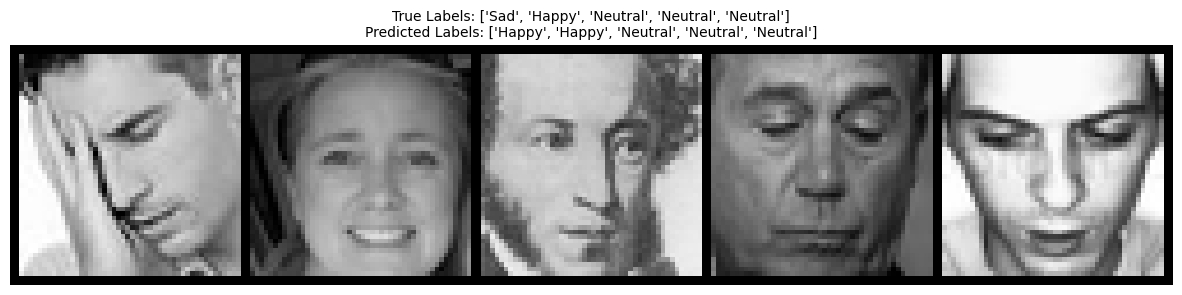

Image 1: True Label: Sad, Predicted Label: Happy
Image 2: True Label: Happy, Predicted Label: Happy
Image 3: True Label: Neutral, Predicted Label: Neutral
Image 4: True Label: Neutral, Predicted Label: Neutral
Image 5: True Label: Neutral, Predicted Label: Neutral


In [ ]:
def visualize_batch_predictions(model, test_loader, num_samples=5):
    """
    Visualize predictions for multiple images in a grid layout.

    Args:
        model (torch.nn.Module): Trained model.
        test_loader (torch.utils.data.DataLoader): DataLoader for test set.
        num_samples (int): Number of images to display.
    """
    # Define the emotion mapping inside the function
    emotion_mapping = {0: 'Neutral', 1: 'Happy', 2: 'Surprise', 3: 'Sad', 4: 'Anger',
                       5: 'Disgust', 6: 'Fear', 7: 'Contempt', 8: 'Unknown', 9: 'NF'}

    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        # Collect all test images and labels from the DataLoader
        all_images, all_labels = [], []
        for images, labels in test_loader:
            all_images.append(images)
            all_labels.append(labels)

        # Concatenate all batches into single tensors
        all_images = torch.cat(all_images)
        all_labels = torch.cat(all_labels)

        # Randomly sample `num_samples` images and labels
        total_samples = len(all_images)
        random_indices = random.sample(range(total_samples), num_samples)
        sampled_images = all_images[random_indices]
        sampled_labels = all_labels[random_indices]

        # Get predictions
        outputs = model(images[:num_samples])  # Pass only the required number of samples
        _, predicted = torch.max(outputs, 1)

        # Create a grid of images
        grid = torchvision.utils.make_grid(sampled_images, nrow=num_samples, padding=2)
        plt.figure(figsize=(15, 5))
        plt.imshow(grid.permute(1, 2, 0))  # Permute to (H, W, C) for plt.imshow
        plt.axis('off')

        # Display true and predicted labels
        true_labels = [emotion_mapping[sampled_labels[idx].item()] for idx in range(num_samples)]
        predicted_labels = [emotion_mapping[predicted[idx].item()] for idx in range(num_samples)]
        plt.title(f"True Labels: {true_labels}\nPredicted Labels: {predicted_labels}", fontsize=10)
        plt.show()

        # Print predictions in the console
        for i in range(num_samples):
            print(f"Image {i + 1}: True Label: {true_labels[i]}, Predicted Label: {predicted_labels[i]}")


# Example usage: Call the function without passing emotion_mapping
visualize_batch_predictions(model, test_loader, num_samples=5)

# Output Documentation: Batch Prediction Visualization

The function **`visualize_batch_predictions`** outputs both a visual grid and console logs of the true and predicted labels for the sampled images. Below is the documentation for the specific output provided.

---

## **Output Details**

### **Visual Output**
- A **grid of 5 images** selected randomly from the test dataset.
- Each image in the grid is labeled with its **True Label** (ground truth) and **Predicted Label** (model's prediction).

### **Console Output**
- A textual representation of the **True Labels** and **Predicted Labels** for the same images, printed line by line.

---

## **Example Console Output**

```plaintext
Image 1: True Label: Sad, Predicted Label: Happy
Image 2: True Label: Happy, Predicted Label: Happy
Image 3: True Label: Neutral, Predicted Label: Neutral
Image 4: True Label: Neutral, Predicted Label: Neutral
Image 5: True Label: Neutral, Predicted Label: Neutral
```

---

## **Interpretation of the Output**

1. **Image 1**:
   - **True Label**: Sad — The model's prediction was **incorrect**.
   - **Predicted Label**: Happy.

2. **Image 2**:
   - **True Label**: Happy — The model's prediction was **correct**.
   - **Predicted Label**: Happy.

3. **Image 3 to 5**:
   - **True Label**: Neutral — The model's predictions for these images were **all correct**.
   - **Predicted Label**: Neutral.

---

## **Accuracy Insights**
- Out of 5 images:
  - **3 predictions were correct** (Images 2, 3, 4, 5).
  - **1 prediction was incorrect** (Image 1).
- This suggests a 60% accuracy for this specific batch of predictions.

---

## **Additional Notes**
- **Bias Observation**: The model seems to perform well with "Neutral" and "Happy" labels but misclassified "Sad." This might indicate a potential area for improvement in the model's training or the dataset's representation.
- **Output Consistency**: The visual grid in the UI will align with these textual logs for clarity.

This output serves as a quick diagnostic tool for assessing the model's strengths and weaknesses on a per-batch basis.